# Description:

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.


# Objective:

Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Let's understand our features and target variable:

1) ID number

2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

# 'M' is Malignant and 'B' is Benign

In [5]:
df["diagnosis"] = df["diagnosis"].map({"B":0,"M":1})

# Exploratory Data Analysis

In [6]:
df = df.drop("id", axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df1 = df.drop("diagnosis",axis=1)

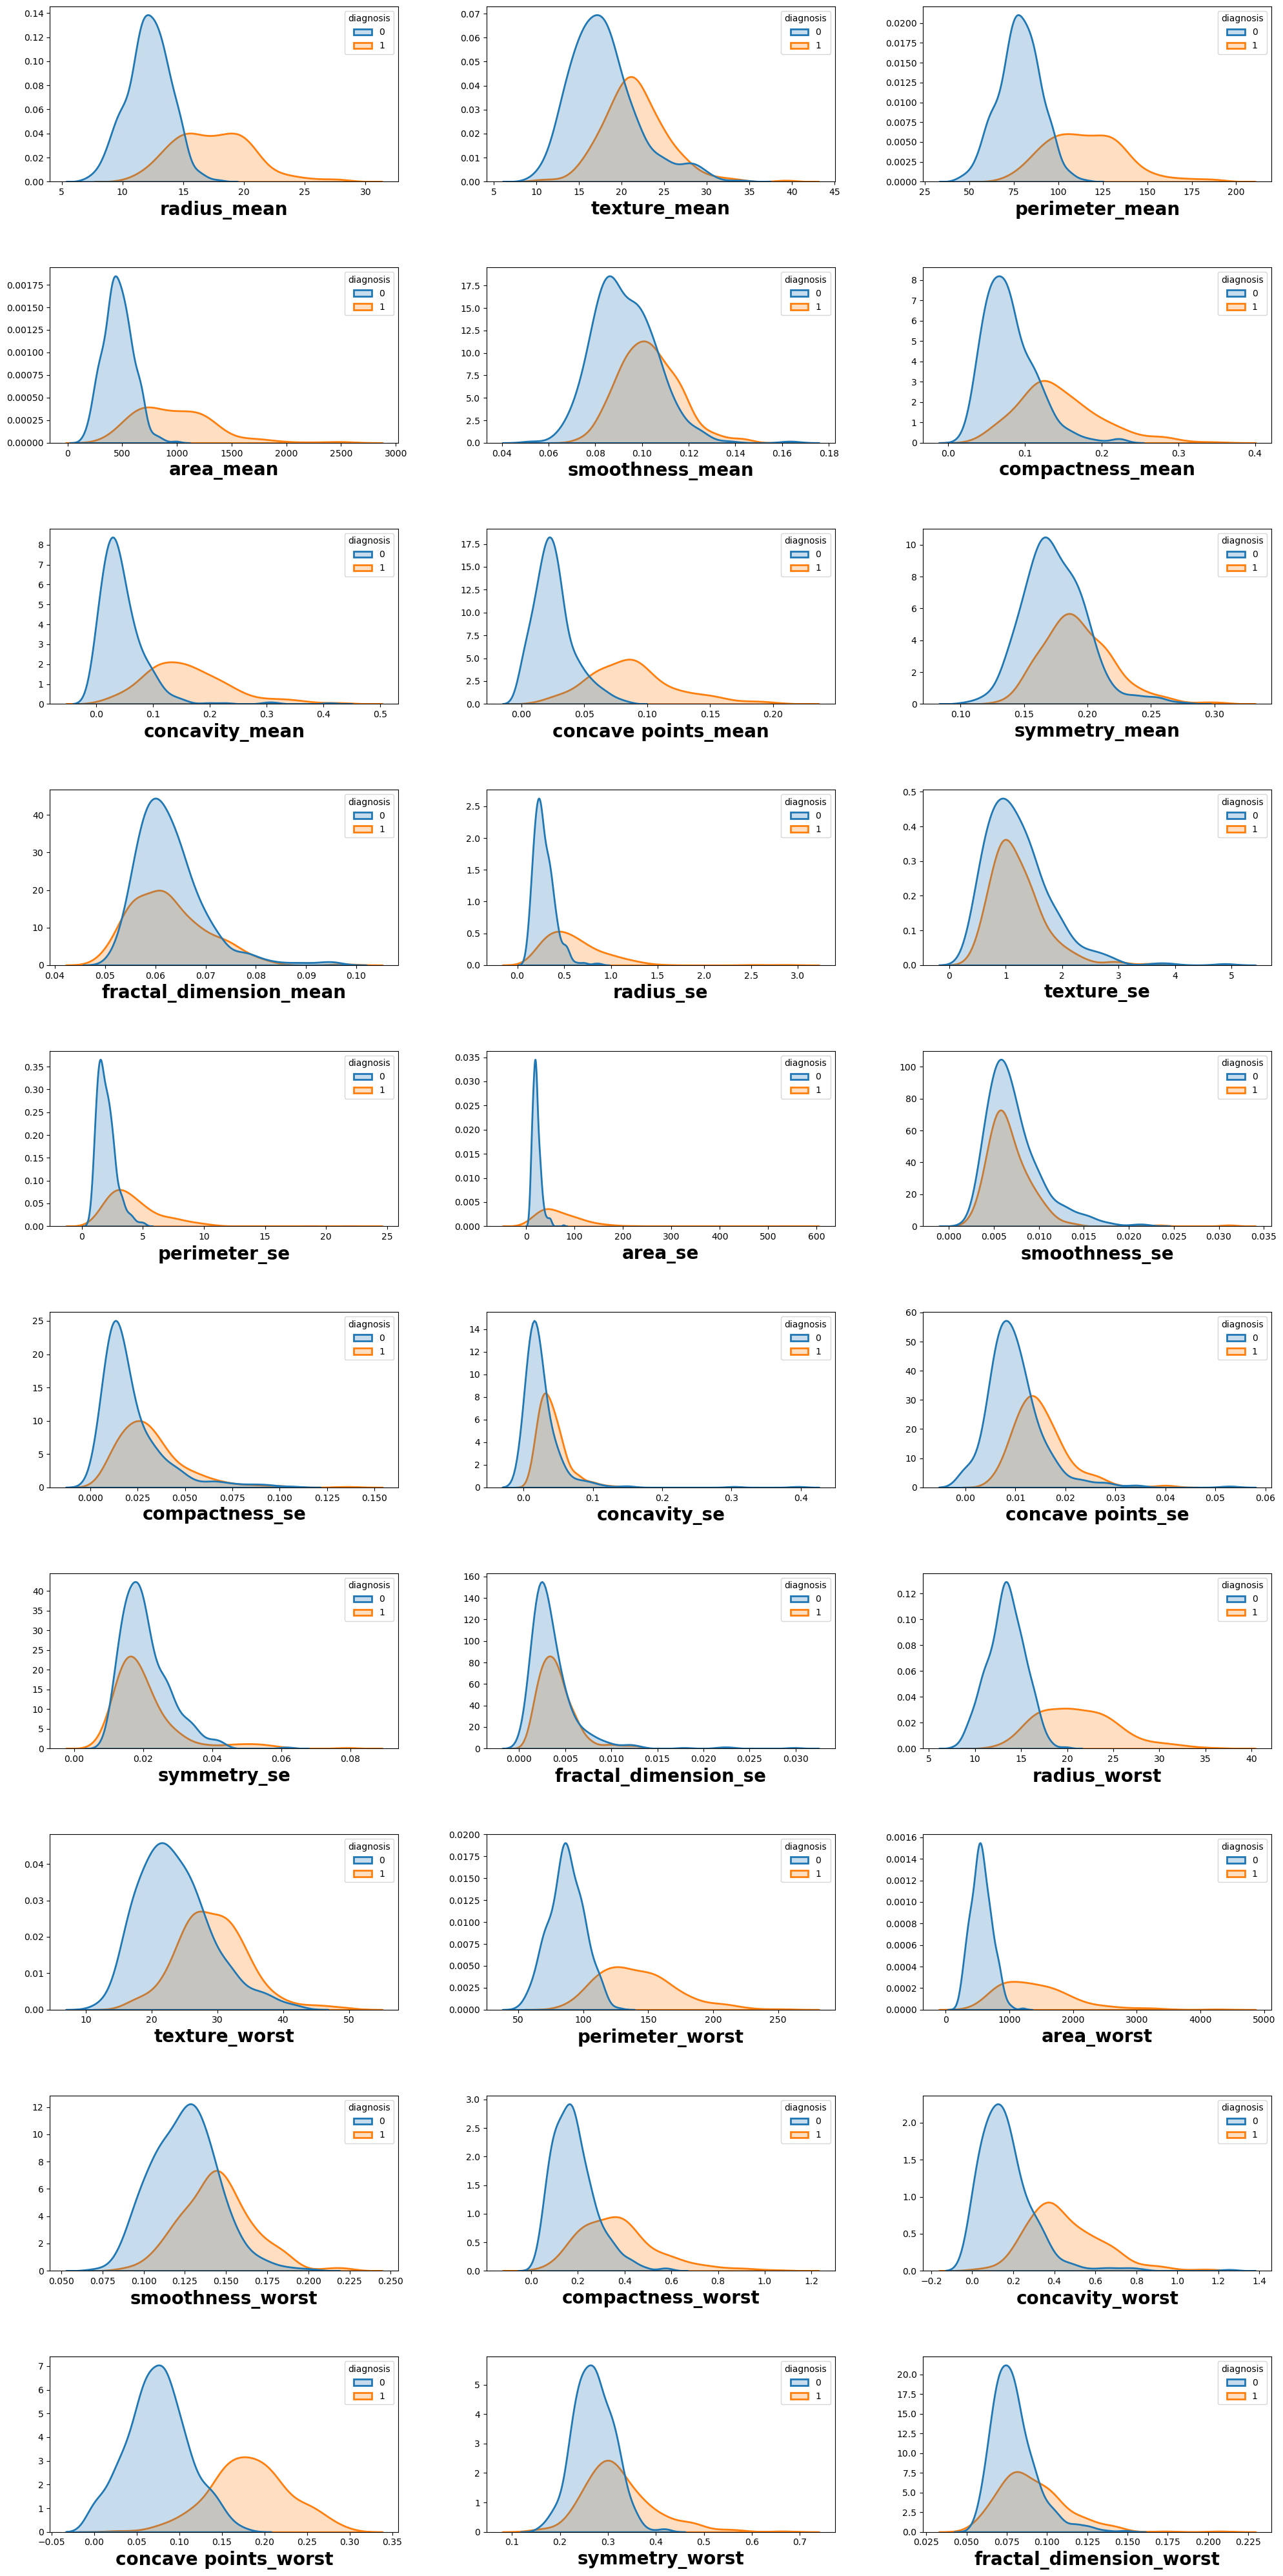

In [8]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 20, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

In [9]:
df1.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

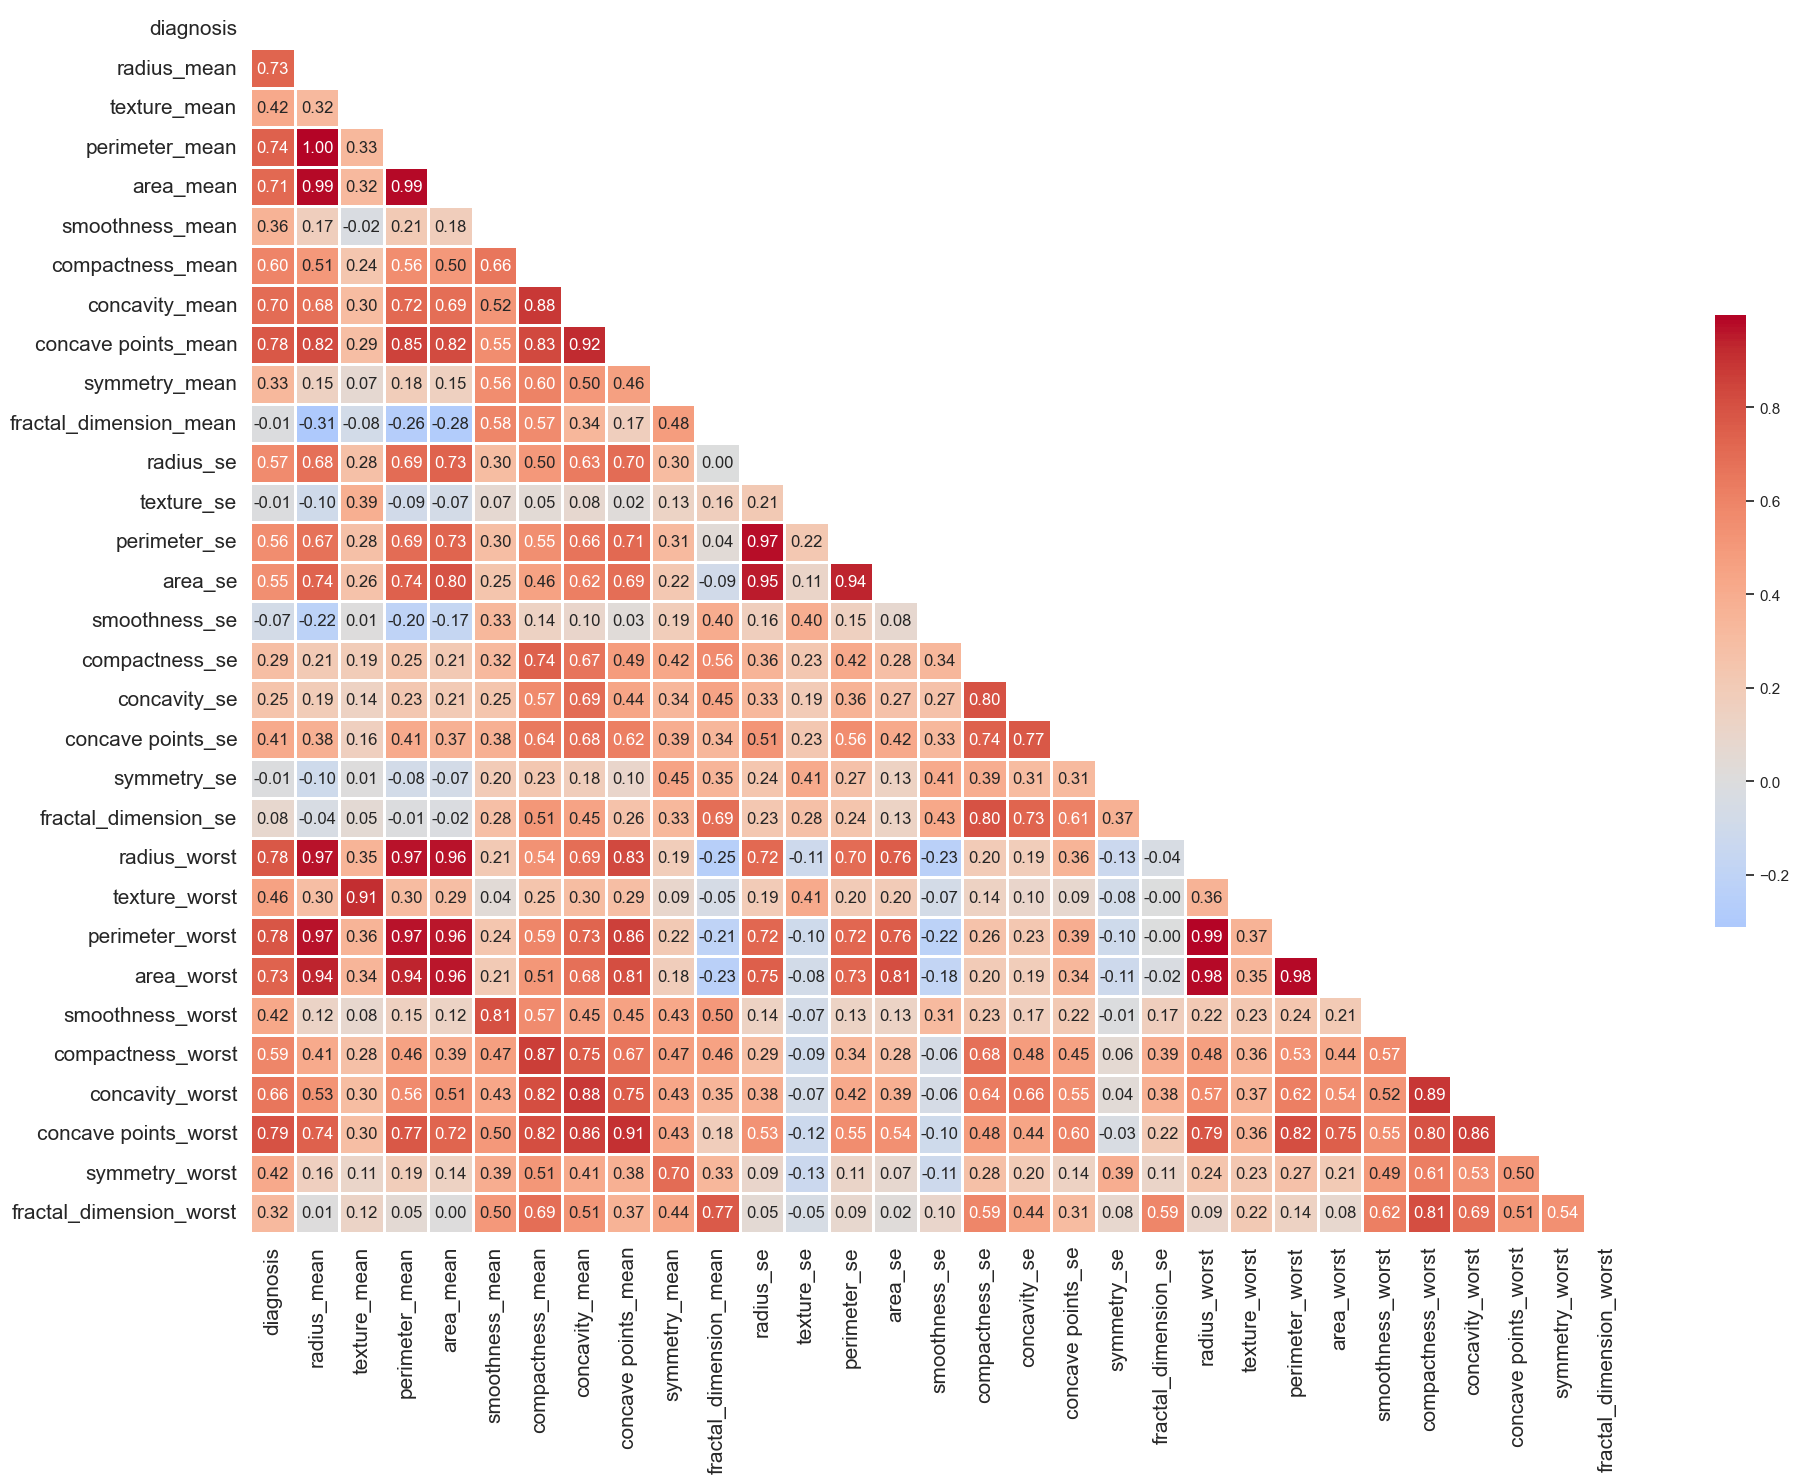

In [11]:
sns.set_theme(style="white")

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df.select_dtypes(include="number").corr(), dtype=bool))
ax = sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm', fmt='.2f',
                 linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)
    
plt.tight_layout()
plt.show()

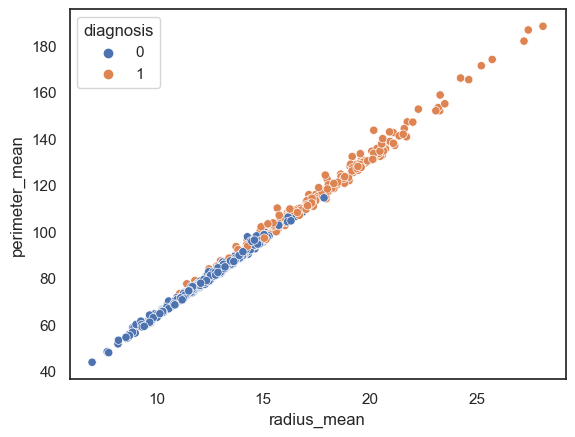

In [12]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df, hue='diagnosis')
plt.show()

In [13]:
#X&Y

X = df1
y = df["diagnosis"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling with Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

#Prediction

ypred_train = log_reg.predict(X_train)

#Train_Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train,ypred_train))

#Cross Validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(log_reg,X_train,y_train, cv=5,scoring="accuracy").mean())

#Testing

ypred_test = log_reg.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9912087912087912
CV Score: 0.9670329670329669
Test Accuracy: 0.9736842105263158


In [17]:
# Checking for Best Random State

In [18]:
Train = []
Test = []
CV = []

for i in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    best_random = LogisticRegression()
    best_random.fit(X_train,y_train)
    ypred_train = best_random.predict(X_train)
    ypred_test  = best_random.predict(X_test)
    Train.append(best_random.score(X_train,y_train))
    Test.append(best_random.score(X_test,y_test))
    CV.append(cross_val_score(best_random,X,y, cv=5,scoring="accuracy").mean())

em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm = em[(abs(em["Train"]-em["Test"])<=0.5) & (abs(em["Test"]-em["CV"])<=0.5)]

print("best random state number is :",gm[gm["Test"]==gm["Test"].max()].index.to_list()[0])

best random state number is : 38


# Remodelling with Best Random

In [19]:
# x&y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=38)

#Sranders Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Modelling
log_reg_best = LogisticRegression()
log_reg_best.fit(X_train,y_train)

#Prediction
ypred_train = log_reg_best.predict(X_train)

#Train_Accuracy
print("Train Accuracy:", accuracy_score(y_train,ypred_train))

#Cross Validation Score
print("CV Score:", cross_val_score(log_reg_best,X_train,y_train, cv=5,scoring="accuracy").mean())

#Testing
ypred_test = log_reg_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

Train Accuracy: 0.989010989010989
CV Score: 0.9846153846153847
Test Accuracy: 0.9736842105263158


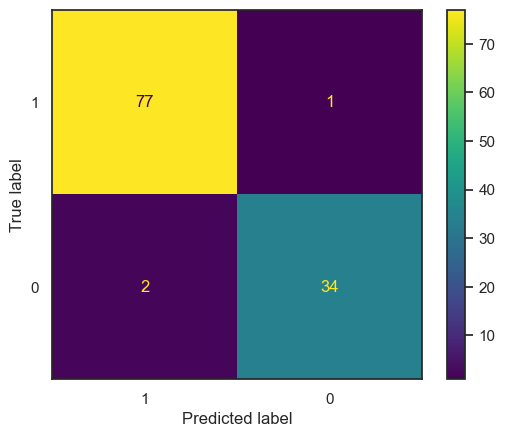

In [20]:
#Confusion Metric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df["diagnosis"].unique()).plot()
plt.show()

In [21]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           1       0.97      0.94      0.96        36

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



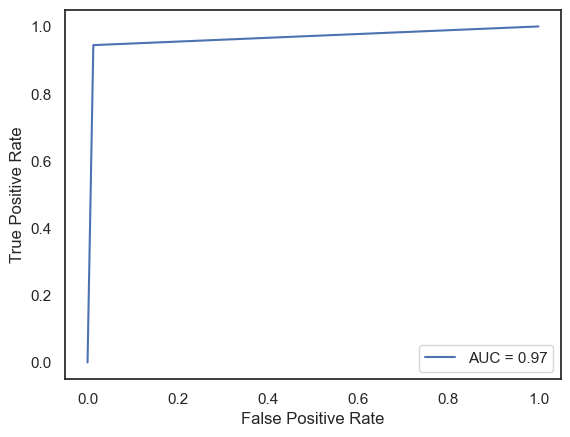

In [22]:
#ROC Curve

from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

# Modeling Building Through KNN

In [23]:
#HyperParameter Tuning for KNN classifier

from sklearn.neighbors import KNeighborsClassifier
estimater = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,10))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimater, param_grid, cv=5, scoring="accuracy")

cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 5}

In [25]:
#Modelling with best HyperParameter

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


#Prediction
y_pred_test_KNN = knn.predict(X_test)
y_pred_train_KNN = knn.predict(X_train)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,y_pred_train_KNN))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test_KNN))

from sklearn.model_selection import cross_val_score
print("cross validation score",cross_val_score(knn,X_train,y_train, cv=5,scoring="accuracy").mean())

Train Accuracy: 0.9758241758241758
Test Accuracy: 0.956140350877193
cross validation score 0.9714285714285713


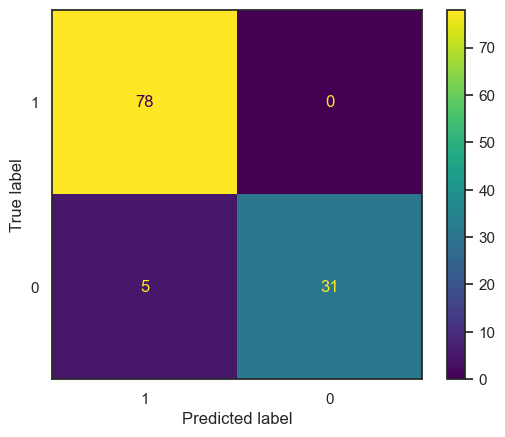

In [26]:
#Confusion Metric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test_KNN)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df["diagnosis"].unique()).plot()
plt.show()

In [27]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_KNN))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        78
           1       1.00      0.86      0.93        36

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



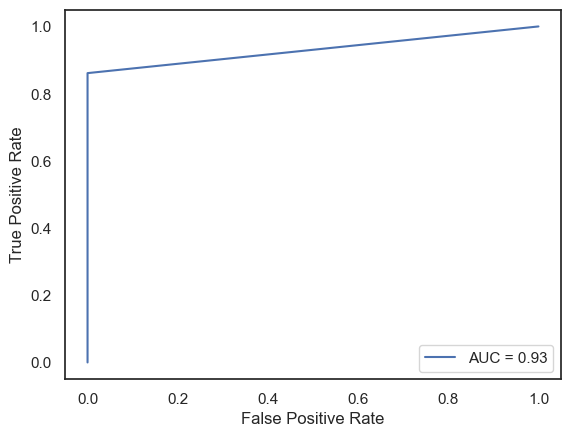

In [28]:
#ROC Curve

from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test_KNN)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

In [29]:
#Above Score concludes that logistic regression is the best fit model for this dataset and will perform better 

# SVM modelling to check whether this approach giving the best accuracy result

In [30]:
# x&y

X = df1
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=38)

In [31]:
#Modelling with SVM

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

#Prediction
Ypred_SVC_test = model.predict(X_test)
Ypred_SVC_train = model.predict(X_train)

#Accuracy 
print("Train Accuracy",accuracy_score(y_train,Ypred_SVC_train))
print("Test Accuracy",accuracy_score(y_test,Ypred_SVC_test))
print("cross validation score for SVC",cross_val_score(model,X_train,y_train, cv=5,scoring="accuracy").mean())

Train Accuracy 0.9098901098901099
Test Accuracy 0.9298245614035088
cross validation score for SVC 0.9076923076923078


In [32]:
#HyperParameter Tuning for SVC

#estimater = SVC()

#param_grid = {"C":list(range(100,200,10)),"kernel":['linear','rbf','sigmoid','poly']}

#grid = GridSearchCV(estimater,param_grid,cv=5,scoring ="accuracy")

#grid.fit(X,y)

In [33]:
#grid.best_params_

In [34]:
#F_modelSVC = SVC(kernel = "linear", C = 180)
#F_modelSVC.fit(X_train,y_train)
#y_pred_train = F_modelSVC.predict(X_train)
#y_pred_test = F_modelSVC.predict(X_test)
#print("train accuracy:",accuracy_score(y_train,y_pred_train))
#print("test accuracy:",accuracy_score(y_test,y_pred_test))

In [35]:
#print("cross validation score for SVC",cross_val_score(F_modelSVC,X_train,y_train, cv=5,scoring="accuracy").mean())

In [36]:
#SVM model is overfitting hence we will stick to logistic for this dataset